In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('openet_huc12_mean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         13386 non-null  object 
 1   huc12        13386 non-null  int64  
 2   ensb_mean    13386 non-null  float64
 3   sebal_mean   13386 non-null  float64
 4   sims_mean    13366 non-null  float64
 5   ptjpl_mean   13386 non-null  float64
 6   alexi_mean   12132 non-null  float64
 7   sseb_mean    13386 non-null  float64
 8   metric_mean  13386 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 941.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [5]:
def irr_year(df):
    """Convert month to irrigation year. This will rreturn month, calender year, and irrigation year"""
    # Irrigation year starts in Nov untill oct of next year and attributed by next year
    month = df['Date'].month
    if month >= 11:
        return month, df['Date'].year, df['Date'].year + 1
    else:
        return month, df['Date'].year, df['Date'].year

In [6]:
df[['month', 'year', 'irr_year']] = df.apply(irr_year, axis=1, result_type='expand')

In [7]:
df

,Date,huc12,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean,month,year,irr_year
0,1999-10-01,170402080608,42.026444,28.041041,28.943985,39.911444,NaN,48.646364,49.580417,10,1999,1999
1,1999-10-01,170402080102,26.512871,18.490520,32.791097,33.195032,NaN,30.227945,23.308316,10,1999,1999
2,1999-10-01,170402080104,30.285855,20.160616,48.614720,38.381079,NaN,38.517728,22.781635,10,1999,1999
3,1999-10-01,170402080106,24.470616,13.929165,36.829052,34.803774,NaN,26.359794,20.717864,10,1999,1999
4,1999-10-01,170402080107,26.152002,12.648812,29.883294,34.669593,NaN,27.575865,27.614493,10,1999,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
13381,2023-12-01,170402080401,6.958857,6.613775,13.948754,8.504706,8.671903,6.975248,1.646916,12,2023,2024
13382,2023-12-01,170402080403,5.467448,4.827527,15.164764,5.874018,5.271535,7.039569,3.649094,12,2023,2024
13383,2023-12-01,170402080205,10.241848,9.108799,14.915002,16.996438,11.904131,8.117858,2.384249,12,2023,2024
13384,2023-12-01,170402080402,4.782044,1.460260,11.349560,5.358675,6.204585,6.384312,3.411171,12,2023,2024


In [8]:
df = df[df['irr_year'] >= 2000]

In [9]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [10]:
mean_cols = df.columns[2:-3]  # Exclude 'HUC12', 'Date', 'month', 'year', 'irr_year'

In [11]:
mean_cols

Index(['ensb_mean', 'sebal_mean', 'sims_mean', 'ptjpl_mean', 'alexi_mean',
       'sseb_mean', 'metric_mean'],
      dtype='object')

In [12]:
df_irr_yr = df.groupby(['huc12', 'irr_year',])[mean_cols].sum().reset_index()
df_cs_yr = df_cs.groupby(['huc12', 'year',])[mean_cols].sum().reset_index() 
df_non_cs_yr = df_non_cs.groupby(['huc12', 'year',])[mean_cols].sum().reset_index()

In [13]:
df_cs[(df_cs['huc12'] == 170402080101) & (df_cs['year'] == 2000)].iloc[:,2:-3].sum() #to ensure we are grouping by cal year cs not irr year

ensb_mean      399.360062
sebal_mean     437.001760
sims_mean      388.792406
ptjpl_mean     455.936712
alexi_mean       0.000000
sseb_mean      357.344348
metric_mean    342.465236
dtype: float64

In [14]:
df_cs_yr

,huc12,year,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean
0,170402080101,2000,399.360062,437.001760,388.792406,455.936712,0.000000,357.344348,342.465236
1,170402080101,2001,382.659289,371.552793,339.372447,404.832102,439.107233,378.459726,318.861538
2,170402080101,2002,440.867276,469.832648,388.588996,486.563440,473.542131,376.145294,392.764701
3,170402080101,2003,408.317726,486.841290,328.650650,427.309366,449.935179,315.694999,311.744714
4,170402080101,2004,461.026796,507.243268,446.791097,483.221238,519.470184,376.318726,422.603827
...,...,...,...,...,...,...,...,...,...
1099,170402080608,2019,724.654295,731.318923,666.106534,748.875476,658.677267,715.147773,697.023454
1100,170402080608,2020,732.208345,718.997642,645.165533,665.827156,716.192237,753.796954,730.898052
1101,170402080608,2021,652.548121,705.519478,662.474702,609.843504,610.093850,678.931616,595.379125
1102,170402080608,2022,685.170003,749.295015,687.568046,645.401750,649.675703,697.596138,625.960724


In [15]:
#sen slope
def analyze_trends(df, var_list=mean_cols, sort_yr = 'irr_year'):
    results = []

    for huc12, group in df.groupby('huc12'):
        group_sorted = group.sort_values(sort_yr)

        trend_data = {'huc12': huc12}

        for var in var_list:
            series = group_sorted[var].values

            try:
                result = mk.original_test(series)
                trend_data[f'{var}_slope'] = result.slope
                trend_data[f'{var}_p'] = result.p
                trend_data[f'{var}_trend'] = result.trend
            except Exception as e:
                trend_data[f'{var}_slope'] = None
                trend_data[f'{var}_p'] = None
                trend_data[f'{var}_trend'] = None

        results.append(trend_data)

    return pd.DataFrame(results)

In [16]:
trend_df_cs = analyze_trends(df_cs_yr, sort_yr='year')  # your HUC12-year aggregated dataframe

In [17]:
trend_df_cs

,huc12,ensb_mean_slope,ensb_mean_p,ensb_mean_trend,sebal_mean_slope,sebal_mean_p,sebal_mean_trend,sims_mean_slope,sims_mean_p,sims_mean_trend,...,ptjpl_mean_trend,alexi_mean_slope,alexi_mean_p,alexi_mean_trend,sseb_mean_slope,sseb_mean_p,sseb_mean_trend,metric_mean_slope,metric_mean_p,metric_mean_trend
0,170402080101,4.587854,0.001157,increasing,4.553468,0.006858,increasing,8.554790,0.000266,increasing,...,increasing,0.769142,0.568338,no trend,5.779259,0.000004,increasing,7.228544,0.001375,increasing
1,170402080102,3.037283,0.003707,increasing,3.214924,0.027273,increasing,5.462466,0.001632,increasing,...,increasing,-2.473604,0.106900,no trend,4.195139,0.000053,increasing,4.803929,0.006858,increasing
2,170402080103,1.876284,0.016127,increasing,2.102952,0.143342,no trend,8.229617,0.000470,increasing,...,no trend,4.979037,0.018452,increasing,1.904996,0.050049,no trend,3.376465,0.039517,increasing
3,170402080104,1.786865,0.023996,increasing,1.997142,0.034999,increasing,5.030866,0.002688,increasing,...,increasing,0.459948,0.637438,no trend,2.630489,0.000565,increasing,3.845310,0.009202,increasing
4,170402080105,3.305909,0.003160,increasing,4.595728,0.001932,increasing,5.120567,0.002281,increasing,...,increasing,-1.922734,0.333358,no trend,3.960632,0.001375,increasing,5.560551,0.003707,increasing
5,170402080106,3.079679,0.009202,increasing,3.687782,0.014064,increasing,7.351131,0.000678,increasing,...,no trend,0.166207,0.980211,no trend,4.384846,0.000219,increasing,4.580517,0.012237,increasing
6,170402080107,3.266014,0.018452,increasing,2.338738,0.086988,no trend,4.550408,0.039517,increasing,...,no trend,1.208079,0.747106,no trend,3.858686,0.001632,increasing,3.633110,0.021065,increasing
7,170402080108,2.780050,0.014064,increasing,3.741016,0.027273,increasing,1.711597,0.286157,no trend,...,no trend,-2.397593,0.172491,no trend,3.787795,0.000390,increasing,3.873815,0.012237,increasing
8,170402080201,2.633984,0.034999,increasing,4.799074,0.056141,no trend,3.679437,0.012237,increasing,...,no trend,1.840036,0.286157,no trend,3.639193,0.004338,increasing,3.782083,0.106900,no trend
9,170402080202,2.973612,0.039517,increasing,2.909247,0.118128,no trend,3.935113,0.016127,increasing,...,no trend,0.914858,0.568338,no trend,3.374734,0.002281,increasing,2.832685,0.157406,no trend


In [18]:
summary = {
    'Variable': [],
    'Increasing': [],
    'Decreasing': [],
    'No Trend': []
}

for var in mean_cols:
    counts = trend_df_cs[f'{var}_trend'].value_counts()
    summary['Variable'].append(var)
    summary['Increasing'].append(counts.get('increasing', 0))
    summary['Decreasing'].append(counts.get('decreasing', 0))
    summary['No Trend'].append(counts.get('no trend', 0))

summary_df = pd.DataFrame(summary)


In [19]:
summary_df

,Variable,Increasing,Decreasing,No Trend
0,ensb_mean,42,0,4
1,sebal_mean,27,0,19
2,sims_mean,42,0,4
3,ptjpl_mean,22,0,24
4,alexi_mean,8,0,38
5,sseb_mean,45,0,1
6,metric_mean,33,0,13


In [21]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [22]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df_cs['huc12'] = trend_df_cs['huc12'].astype(str)

In [23]:
merged_gdf_cs = gdf.merge(trend_df_cs, left_on='huc12', right_on='huc12')

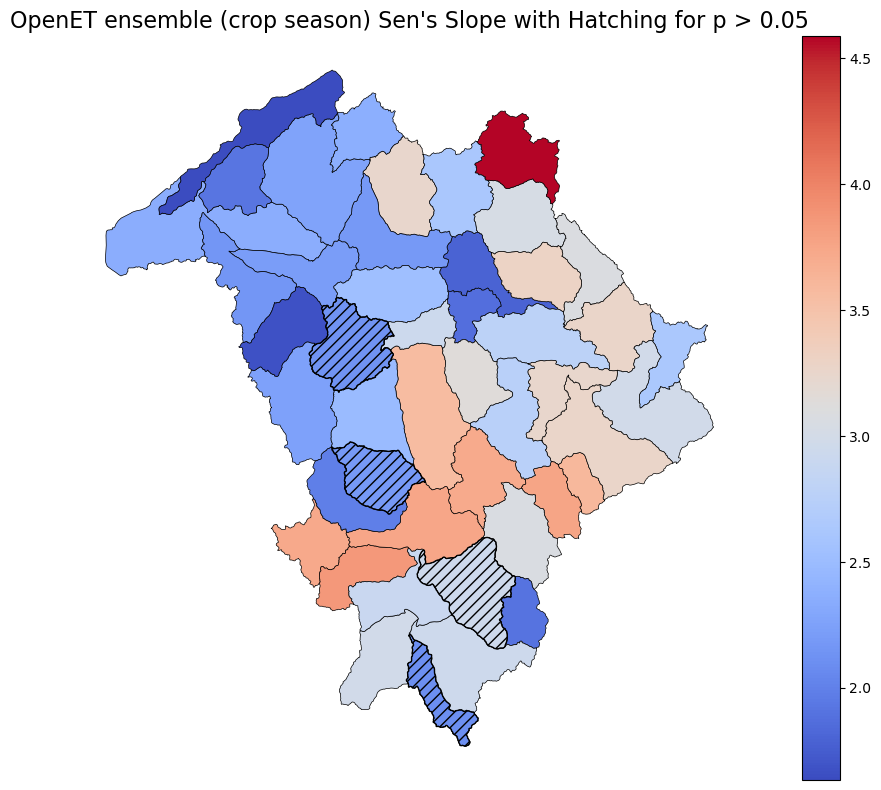

In [24]:
# Create masks for significance
sig = merged_gdf_cs['ensb_mean_p'] < 0.05
not_sig = ~sig

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot filled choropleth for all
merged_gdf_cs.plot(column='ensb_mean_slope', cmap='coolwarm', linewidth=0.5,
                edgecolor='black', legend=True, ax=ax)

# Hatch non-significant polygons
if not_sig.any():
    merged_gdf_cs[not_sig].plot(color='none', edgecolor='black', hatch='///', ax=ax)

ax.set_title("OpenET ensemble (crop season) Sen's Slope with Hatching for p > 0.05", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()